<a href="https://colab.research.google.com/github/mygithub1234/Machine-Learning/blob/main/Personal_Loan_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.



### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
!pip install sqlalchemy_mate==2.0.0.0
!pip install uszipcode

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

# **Importing the necessary libraries**

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from uszipcode import SearchEngine

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics

# to tune different models
from sklearn.model_selection import GridSearchCV



# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

ModuleNotFoundError: No module named 'uszipcode'

## Loading the dataset

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
loan_modelling = pd.read_csv("/content/drive/My Drive/python material/Perosnal Loan Campaign/Loan_Modelling.csv")

In [ ]:
# creating a copy of the data
data = loan_modelling.copy()

# **Data Overview**

### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Checking the shape of the dataset.

In [ ]:
data.shape

(5000, 14)

- The dataset has 5000 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations
  * Age, Experience, Income, CCAvg, Mortage are interpreted as numerical columns
  * Personal_Loan is the target or dependenct variable for which the predictions needs to be made based on the model performance for the Decision Tree
  * Though Education, Securities_Account, CD_Account, Online and CreditCard are interpreted as numerical variables, they are categorical and are encoded by default
  

### Checking for missing values

In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* There are no missing values in the dataset

### Dropping the duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [ ]:
# checking for unique values in ID column
data["ID"].nunique()

5000

* Since all the values in ID column are unique we can drop it

In [ ]:
data.drop(["ID"], axis=1, inplace=True)

### Statistical summary of the dataset.

In [ ]:
data.describe(include="all")

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Observations

  - Customers are in the age range of 23 to 67
  - Experience contains negative values
  - Maximum experience of customers is 43

## Feature Engineering of ZipCodes

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
# Apply iser defined function to and creating a new column called 'County'
search = SearchEngine()
data['County'] = data['ZIPCode'].apply(search.by_zipcode)
data['County'] = data['County'].apply(lambda x: x.to_dict()['county'] if x else 'None')
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [ ]:
# Convert to dictionary
result_dict = data.set_index('County')['ZIPCode'].to_dict()

print(result_dict,sep='\n')

{'Los Angeles County': 90034, 'Alameda County': 94588, 'San Francisco County': 94143, 'San Diego County': 92037, 'Monterey County': 93943, 'Ventura County': 93023, 'Santa Barbara County': 93014, 'Marin County': 94904, 'Santa Clara County': 95134, 'Santa Cruz County': 95064, 'San Mateo County': 94005, 'Humboldt County': 95521, 'Contra Costa County': 94598, 'Orange County': 92612, 'Sacramento County': 95825, 'Yolo County': 95616, 'Placer County': 95747, 'San Bernardino County': 92374, 'San Luis Obispo County': 93401, 'Riverside County': 92220, 'Kern County': 93555, 'None': 92634, 'Fresno County': 93657, 'Sonoma County': 94928, 'El Dorado County': 95762, 'San Benito County': 95023, 'Butte County': 95973, 'Solano County': 94534, 'Mendocino County': 95449, 'San Joaquin County': 95207, 'Imperial County': 92251, 'Siskiyou County': 96094, 'Merced County': 95348, 'Trinity County': 96091, 'Stanislaus County': 95351, 'Shasta County': 96003, 'Tuolumne County': 95370, 'Napa County': 94558, 'Lake Co

In [ ]:
data['County'].replace('None', 'Orange County', inplace=True)

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].astype(float).nunique()

467

# **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Univariate Analysis

In [ ]:
# funcion to create histplot and boxplot for the feature passed
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # defining the figure size
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 3)
    plt.xticks(rotation=90, fontsize=15)
    sns.histplot(data=data, x=feature, kde=kde)
    plt.subplot(2, 2, 4)
    plt.xticks(rotation=90, fontsize=15)
    sns.boxplot(data=data, x=feature)


In [ ]:
# function to create labeled barplots


def labeled_countplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


### Observations On Age

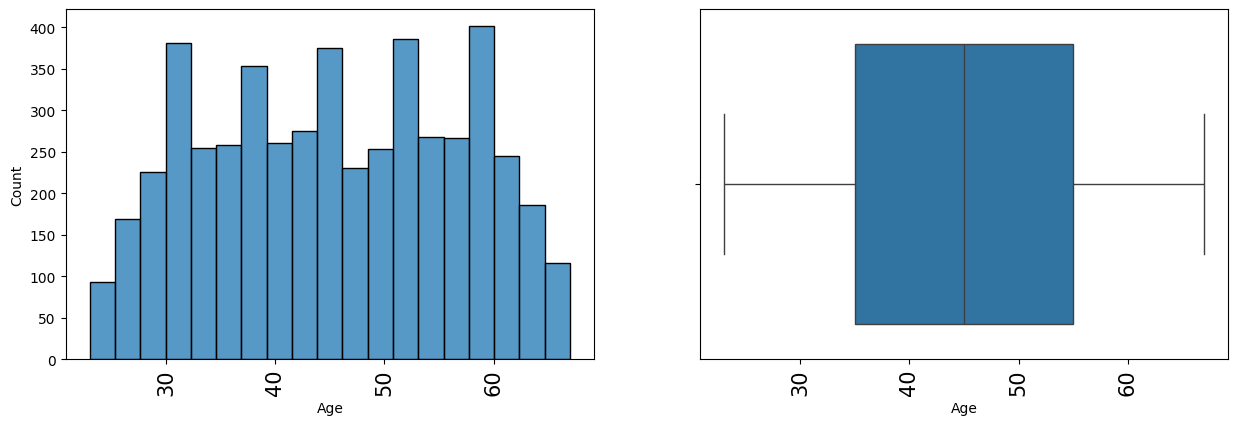

In [ ]:
histogram_boxplot(data, "Age")

Age is normally distributed with mean around 45

### Observations on Experience

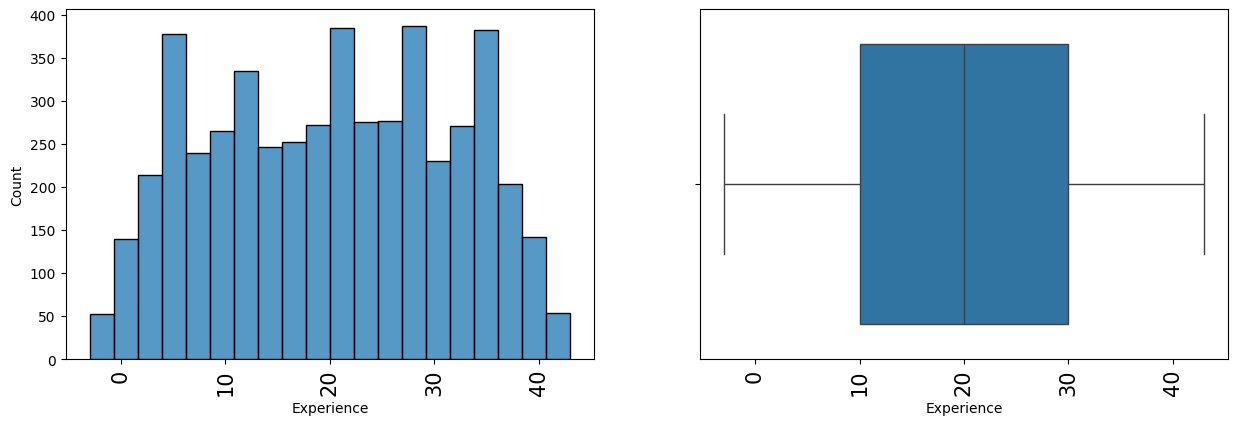

In [ ]:
histogram_boxplot(data, "Experience")

Observations

  Experience is normally distributed without any outliers. Average experience of customers is around 20 years

### Observations On Income

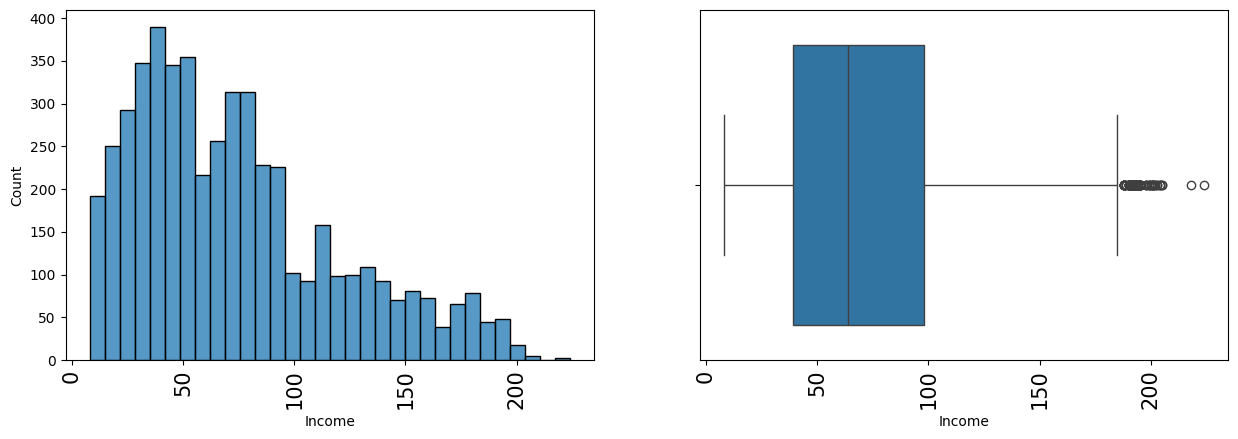

In [ ]:
histogram_boxplot(data, "Income")

- Observation: Income is skewed toward right with outliers.. Mean value of income is around 75000 dollars and there is a significant difference between the mean value and some of the maximum income values

### Observations on CCAvg

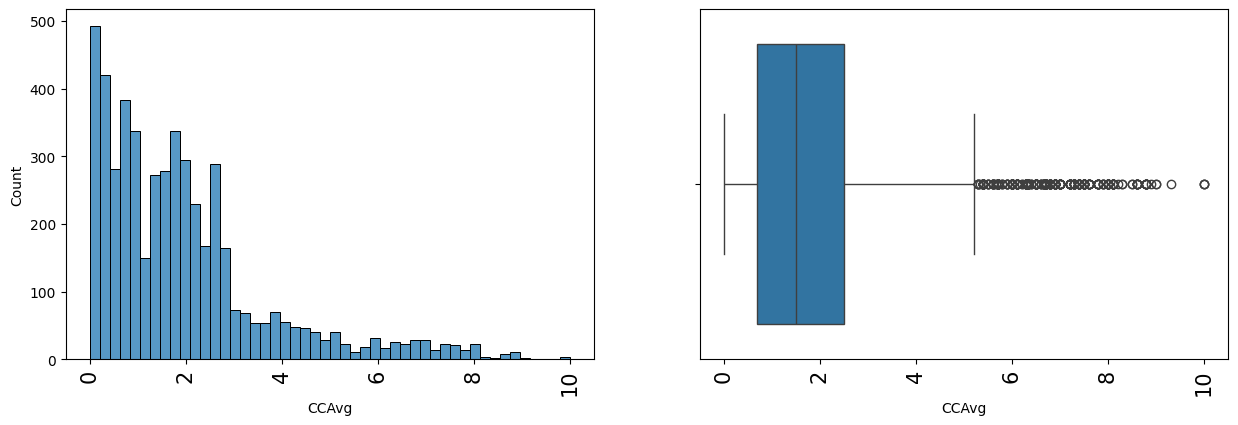

In [ ]:
histogram_boxplot(data, "CCAvg")

  - Observation: Average credit card spending is skewed towards right with outliers in the data

### Observations on Mortgage

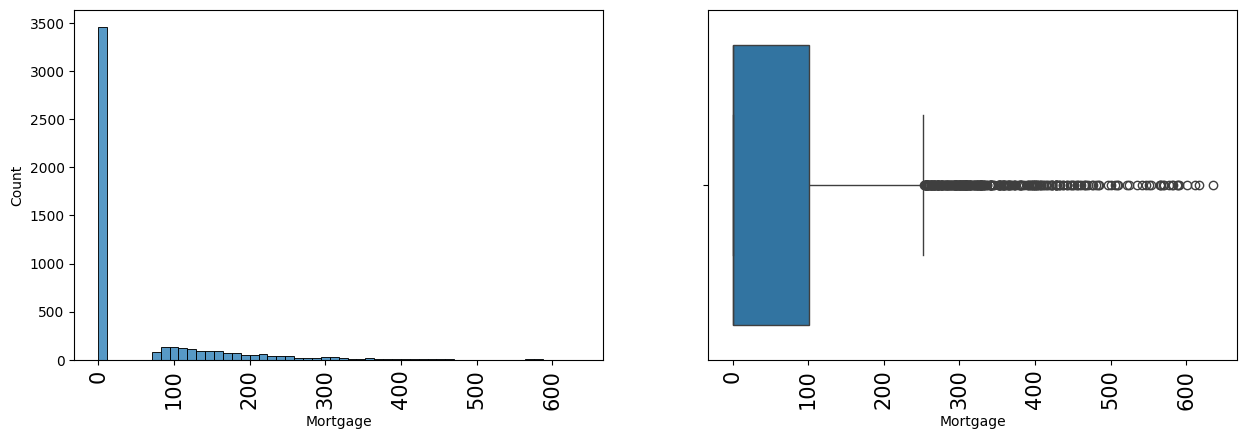

In [ ]:
histogram_boxplot(data, "Mortgage")

  - Observation: Mortage is heavily skewed towards right with dense outliers in the data

### Observations on County

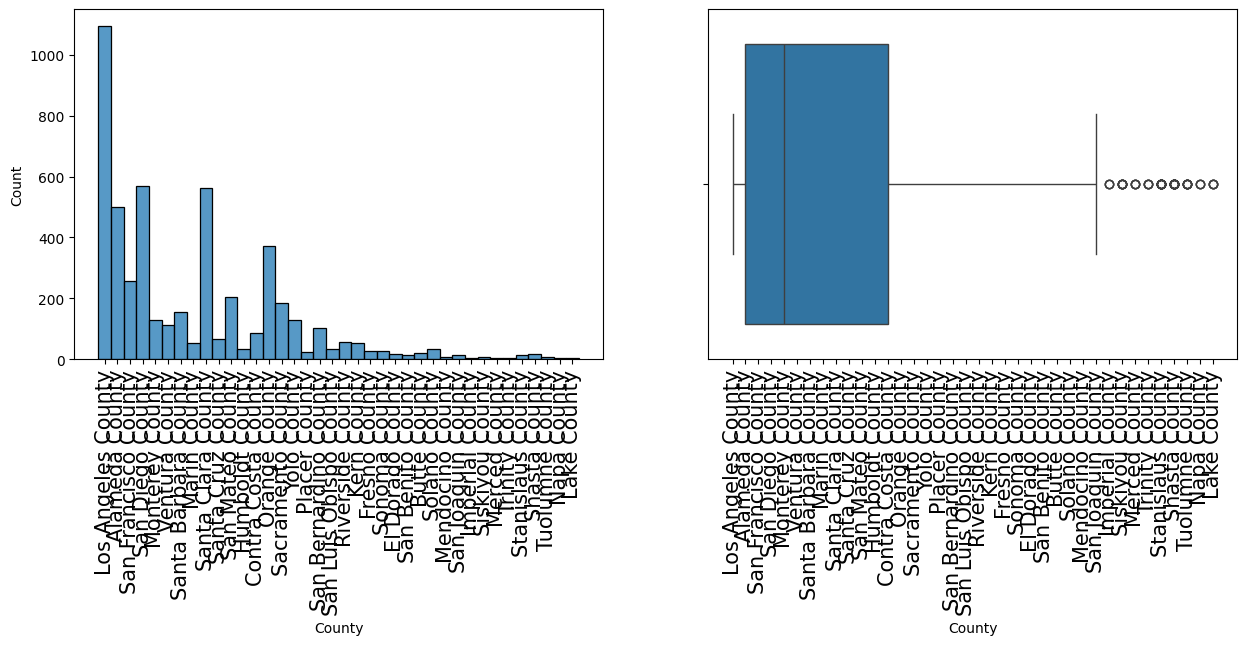

In [ ]:
histogram_boxplot(data, "County")

### Observations on Family

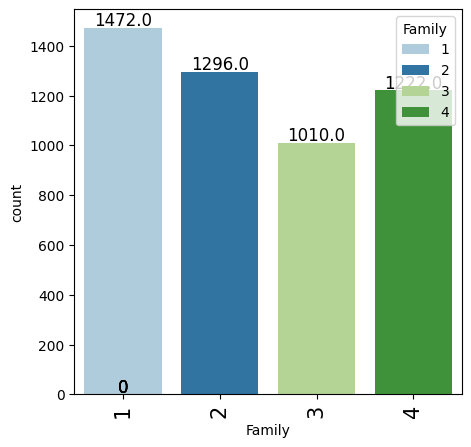

In [ ]:
labeled_countplot(data, "Family")

### Observations on CreditCard

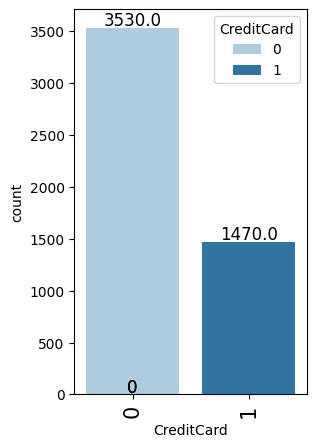

In [ ]:
labeled_countplot(data, "CreditCard")

#### **Percentage of Customers that have credit card**

In [ ]:
percentages = data['CreditCard'].value_counts(normalize=True) * 100

print(percentages)

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64


29.4% Customer have Credit Card

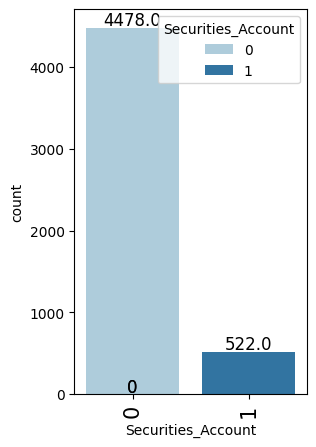

In [ ]:
labeled_countplot(data, "Securities_Account")

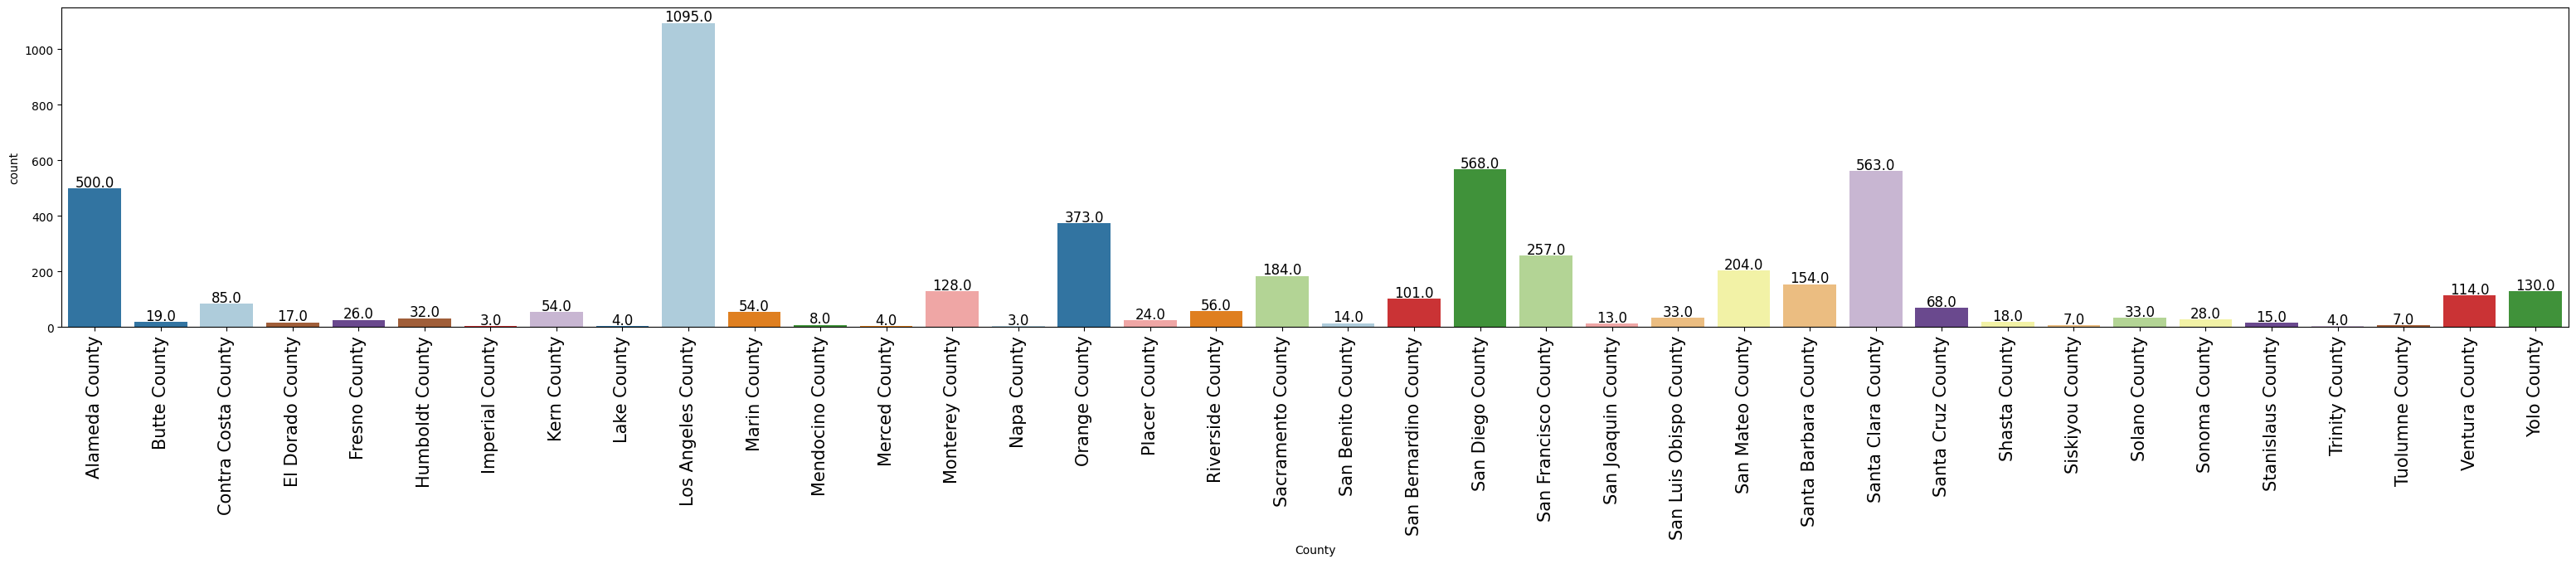

In [ ]:
labeled_countplot(data, "County")

# Bivariate Analysis

In [ ]:
### function to plot distributions wrt Personal_Loan as target


def visualization_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    #target_uniq = data[target].unique()

    axs[0, 0].set_title("kdeplot w.r.t target")
    #Draw KDE plot
    sns.kdeplot(
        data=data,
        x=predictor,
        hue=target,
        ax=axs[0, 0],
        fill=True,
        common_norm=False)

    axs[0, 1].set_title("histplot w.r.t target")

    sns.histplot(
        data=data,
        x=predictor,
        hue=target,
        kde=True,
        ax=axs[0, 1])

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.violinplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=target, palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        hue=target,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Personal_Loan vs Age

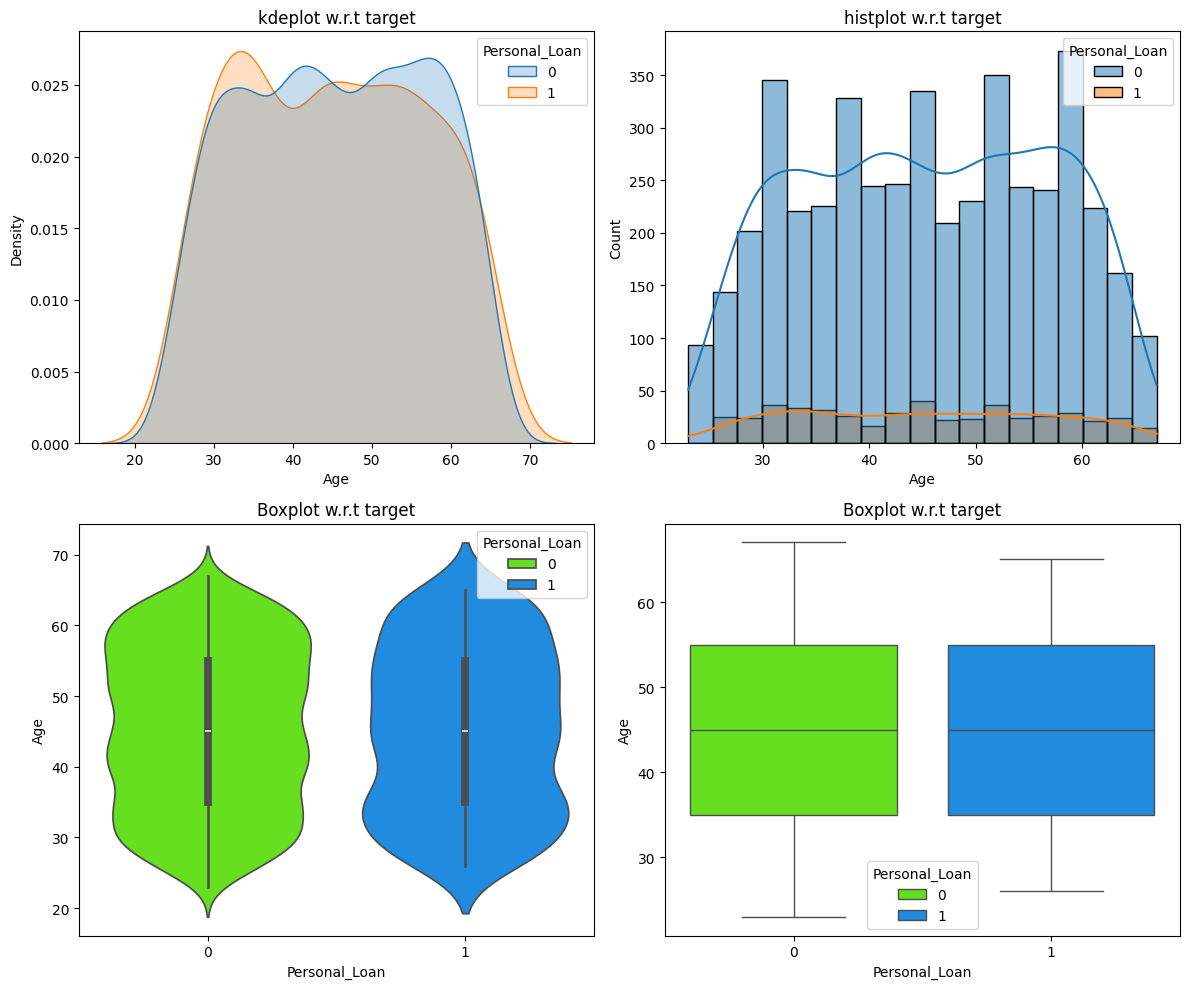

In [ ]:
visualization_wrt_target(data, "Age", "Personal_Loan")

#### Observation:
  Age seems to be homogenously distributed

### Personal_Laon Vs Income

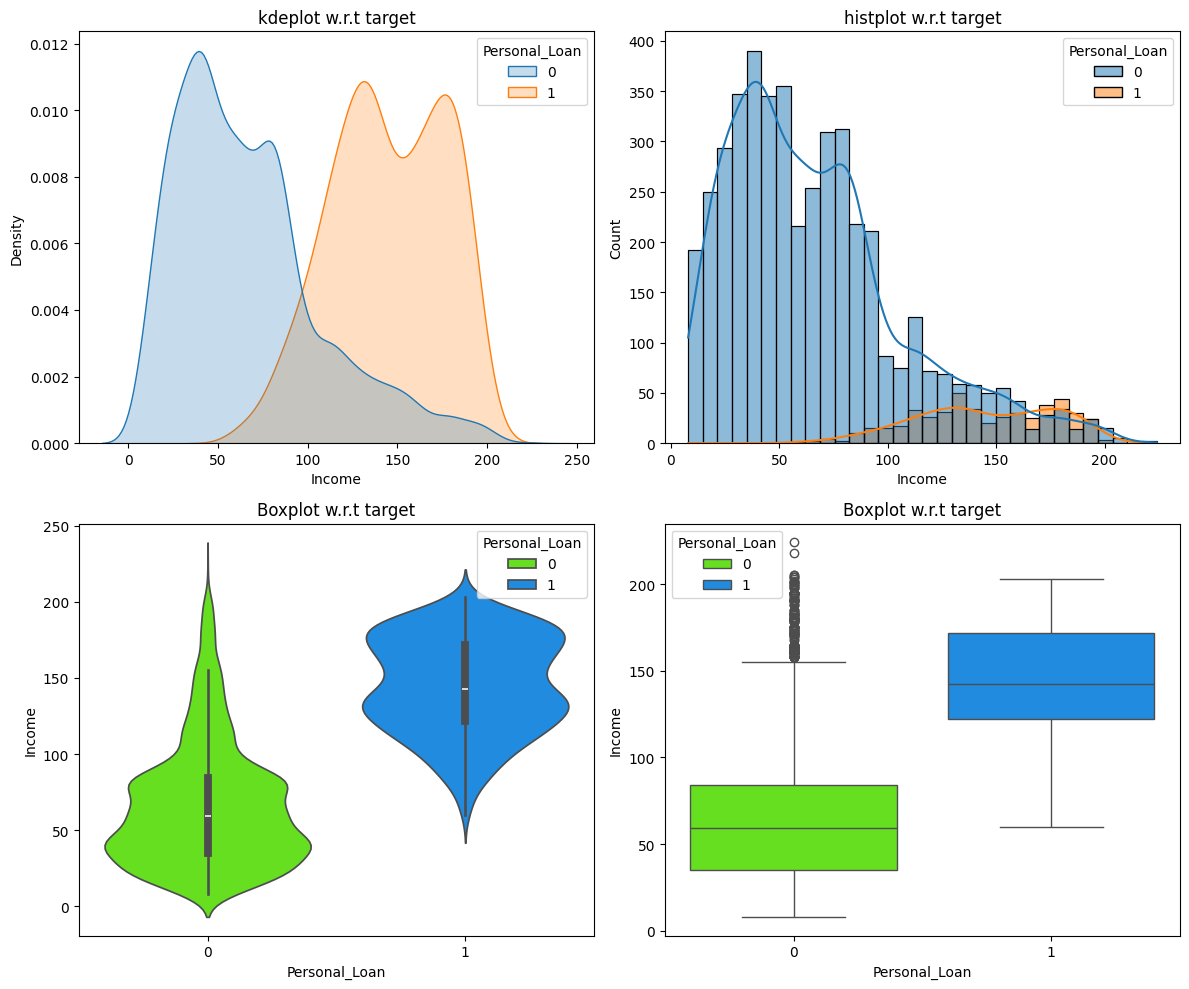

In [ ]:
visualization_wrt_target(data, "Income", "Personal_Loan")

#### Observation:
  - Income is skewed to the right

### Personal_Loan Vz Experience

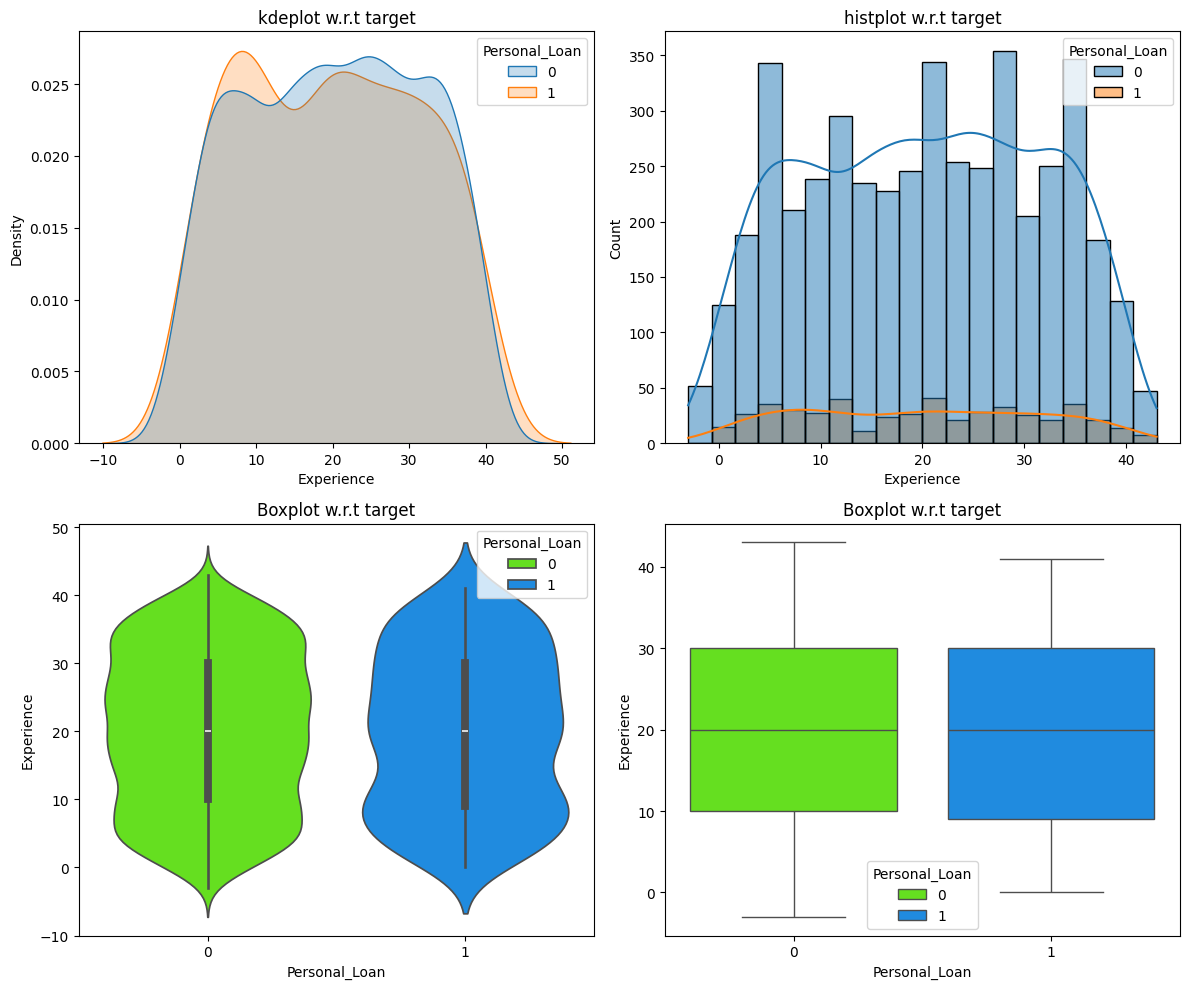

In [ ]:
visualization_wrt_target(data, "Experience", "Personal_Loan")

### Personal_Loan Vs CCAvg

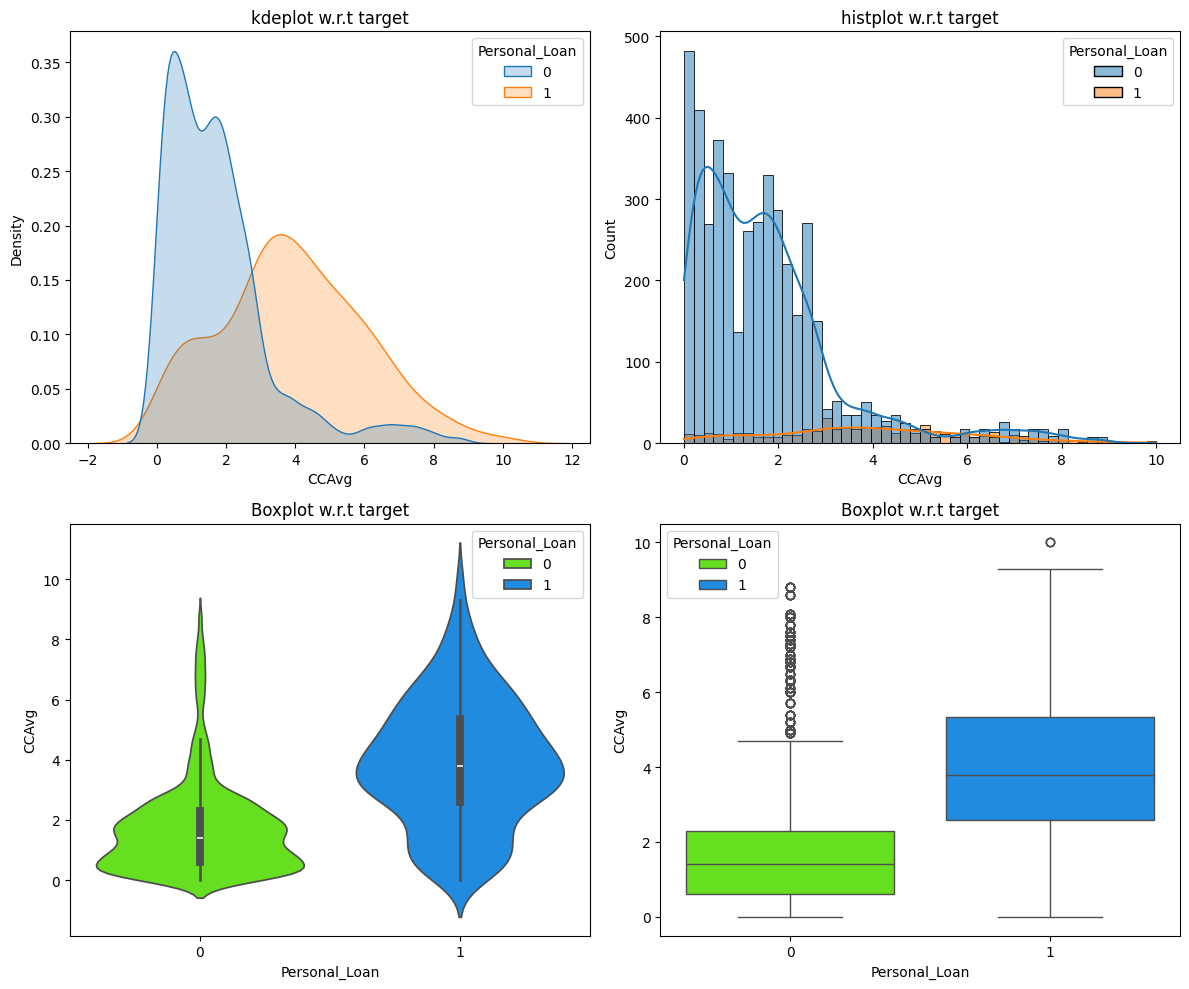

In [ ]:
visualization_wrt_target(data, "CCAvg", "Personal_Loan")

### Personal_Loan Vs Mortgage

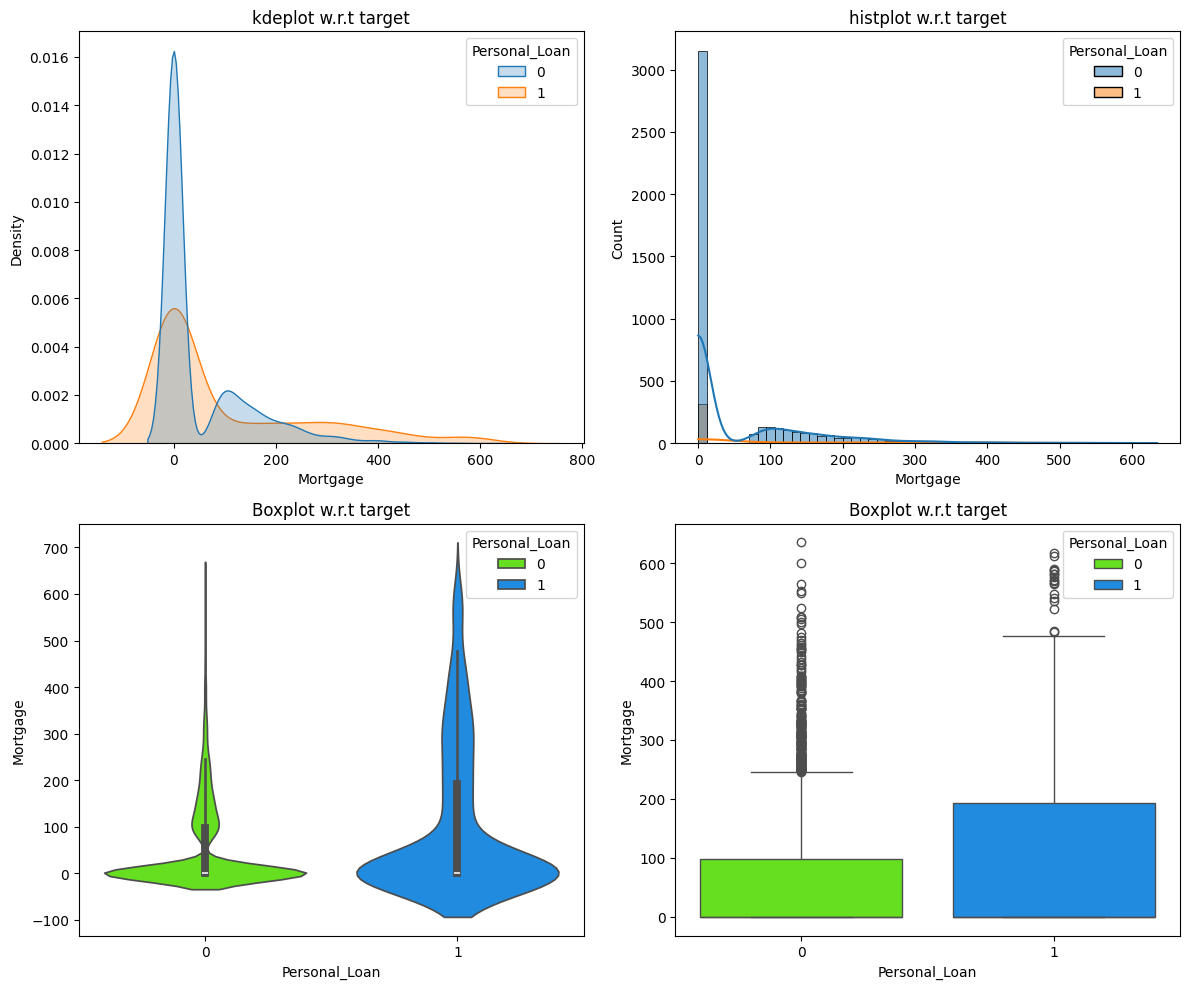

In [ ]:
visualization_wrt_target(data, "Mortgage", "Personal_Loan")

#### Observation:
  - Mortgage has lot of outliers. Customers with high mortage tend to take loan.

In [ ]:
# count plots between categorical columns and Personal_Loan

def count_plot(data, predictor, target):
  """
    count plot between catogorical columns and Personal_Loan

    data: dataframe
    predictor: independent variable
    target: dependent variable
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
  """

  sns.countplot(data=data, x=predictor, hue=target)


In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Personal_Loan Vs Family

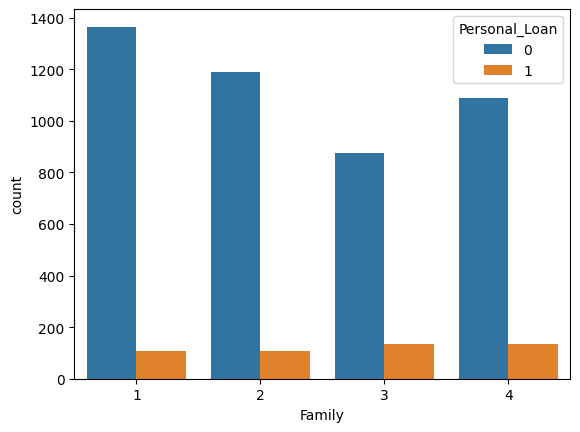

In [ ]:
count_plot(data, "Family", "Personal_Loan")

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


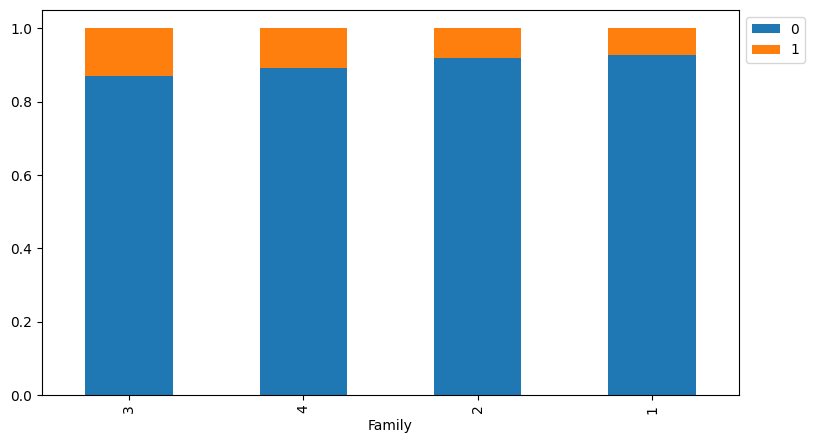

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")

#### Observation
  - Customer that have higher family size tend to take loans

### Personal_loan Vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


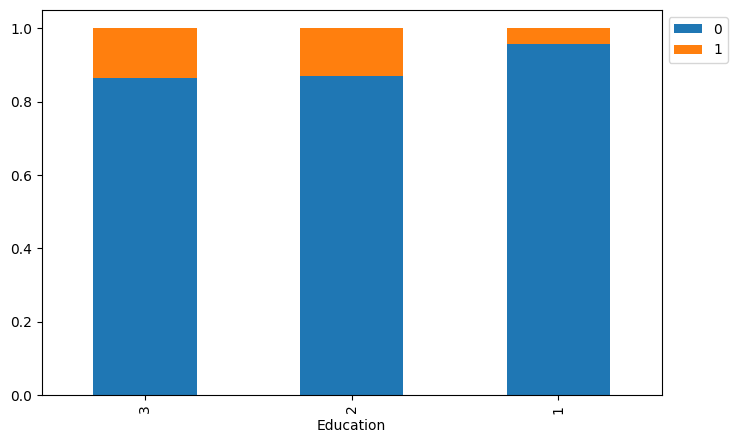

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

#### Observation:

  - Customers with higher education took more loans compared to customers with lesser education

### Personal_Loan Vs County

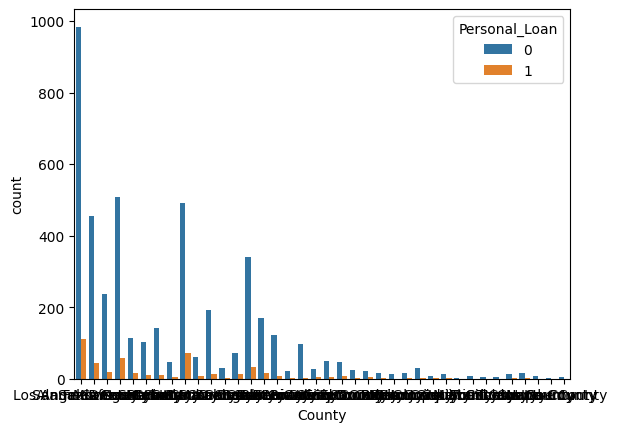

In [ ]:
count_plot(data, "County", "Personal_Loan")

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            340   33   373
San Francisco County     238   19   257
Monterey County          113   15   128
Sacramento County        169   15   184
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           103   11   114
Santa Barbara County     143   11   154
Santa Cruz County         60    8    68
Yolo County              122    8   130
Kern County               47    7    54
Sonoma County             22    6    28
Marin County              48    6    54
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Solano County             30    3    33
San Bernardino County     98    3   101
Shasta County             15    3    18


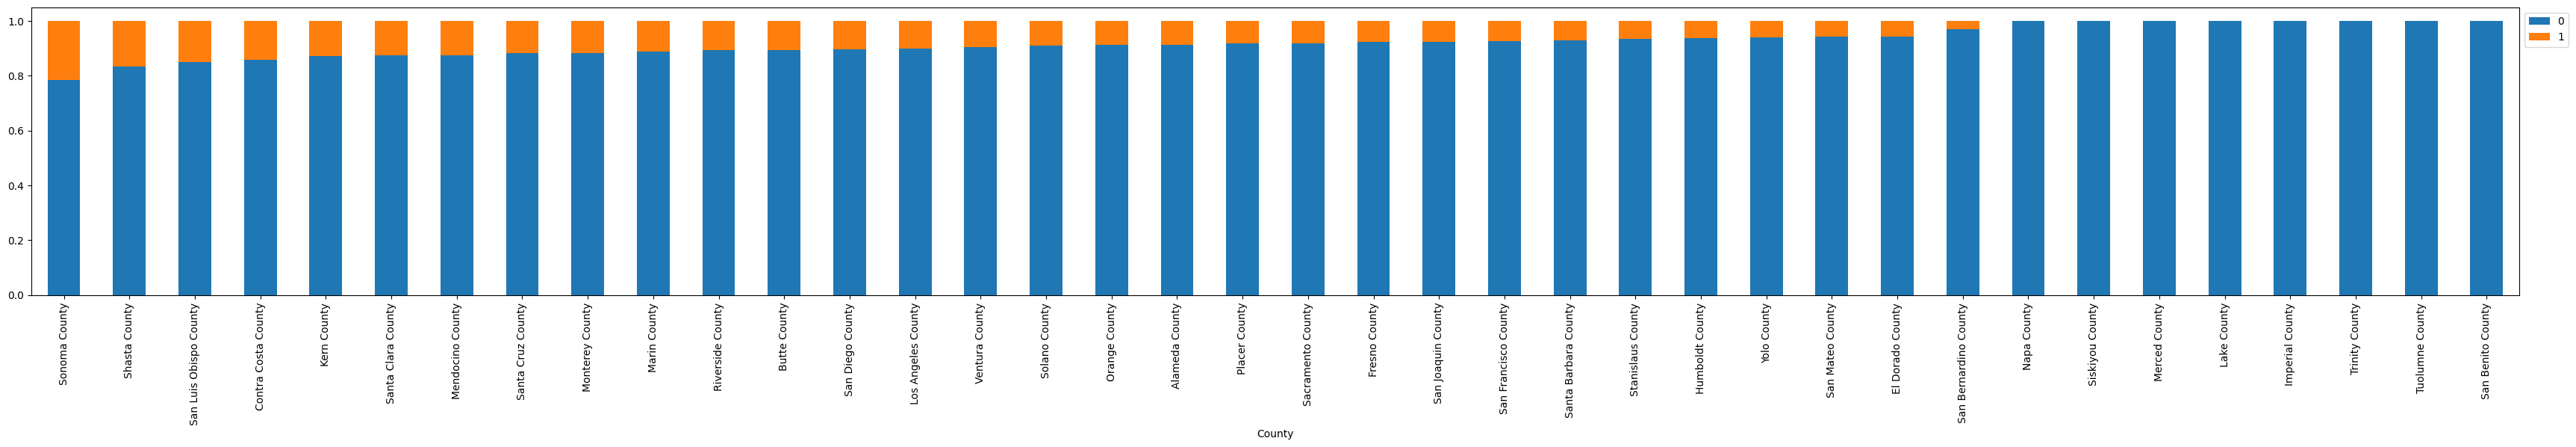

In [ ]:
stacked_barplot(data, "County", "Personal_Loan")

# Multivariate Analysis

<Axes: >

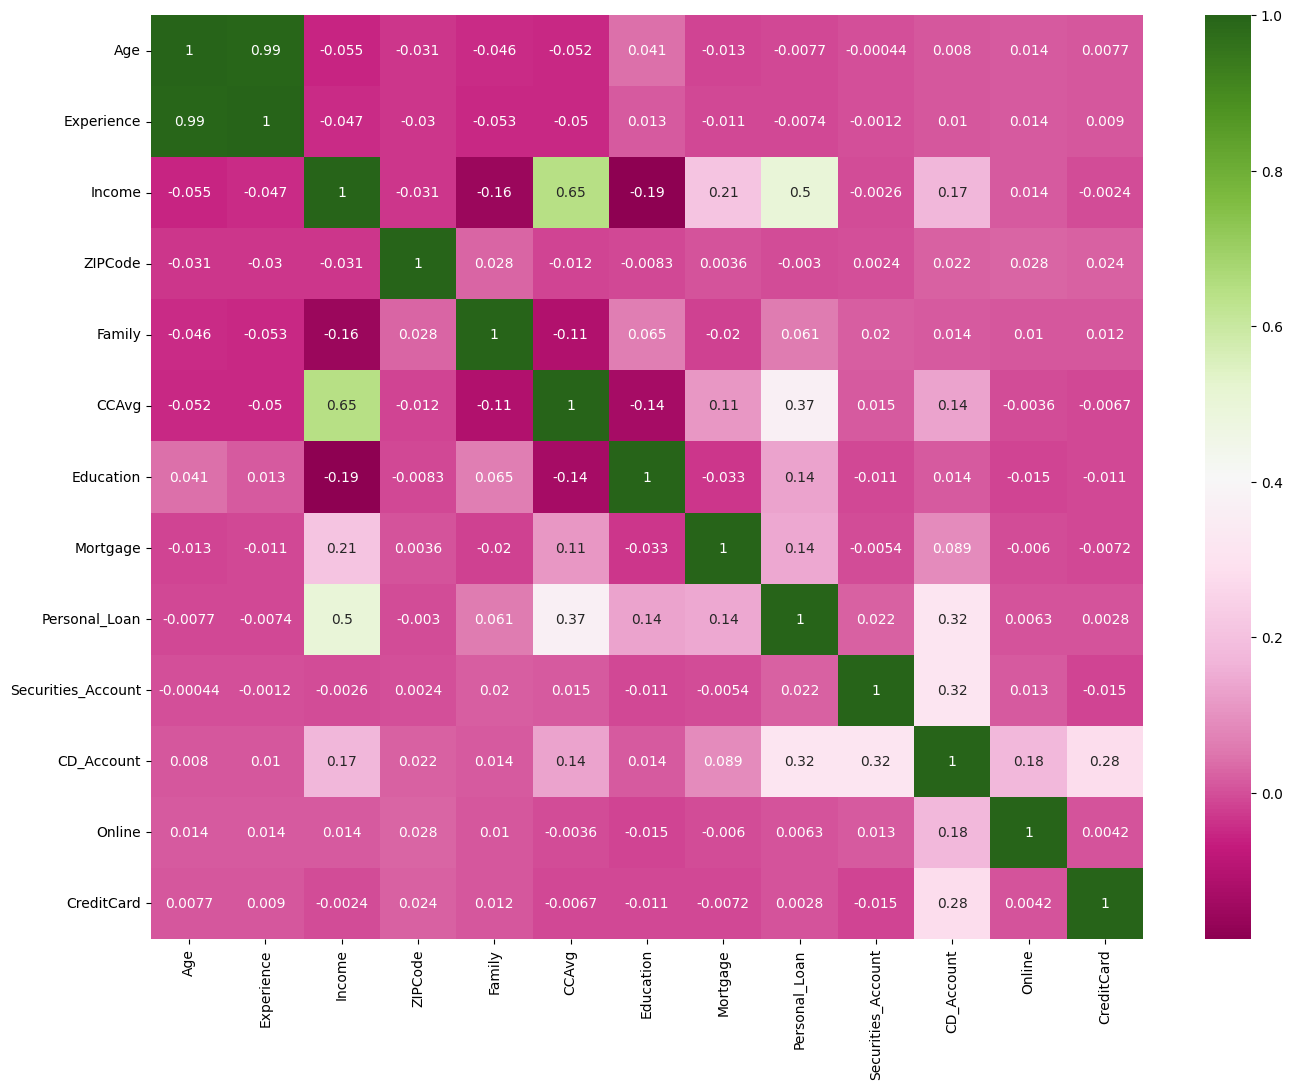

In [ ]:
#Correlation between different variables
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="PiYG")

In [ ]:
# Pair Plot
sns.pairplot(data, hue="Personal_Loan")

  - Observations on Correlation between target attribute and other attributes
    - Income is strongly correlated with Personal_Loan with a strength of 0.5
    - CCAvg is next attribute after Income that is strongly correlated with Personal_Loan
    - Age and Experience shows strong correlation as well..

# **Data Preprocessing**

### Missing value Treatment


In [ ]:
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


* There are no missing values present in the data

### Feature Engineering

In [ ]:
# Checking for unique values of Education
data["Education"].unique()

array([1, 2, 3])

### Feature Engineering for Experience column somce tjere are negative values in the column

In [ ]:
# checking for unique values of Experience
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# Correcting the experience values. Replacing negative values with zero
data["Experience"].replace(-1, 0, inplace=True)
data["Experience"].replace(-2, 0, inplace=True)
data["Experience"].replace(-3, 0, inplace=True)

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
    "County",
]
data[cat_cols] = data[cat_cols].astype("category")
print(data.dtypes)

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
County                category
dtype: object


## Outlier Detection

In [ ]:
# functions to detect and treat outliers using Inter Quartile Range (IQR)
def detect_and_treat_outliers(data, col):
    """
    Detect and treat outliers in a column using IQR

    data: dataframe
    col: column name
    """

    Q1 = data[col].quantile(0.25)       # 25th quantile
    Q3 = data[col].quantile(0.75)       # 75th quantile
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # all the values smaller than lower_limit will be assigned lower_limit
    # all the values higher than upper_limit will be assigned upper_limit

    data[col] = np.clip(data[col], lower_limit, upper_limit)

    return data

In [ ]:
# function to call the detect_and_treat_outliers function on the selected columns
def treat_outliers_all(data, cols):
  """
  Treat outliers in selected columns using IQR

  data: dataframe
  cols: list of column names
  """
  for col in cols:
    data = detect_and_treat_outliers(data, col)

  return data

In [ ]:
#From the EDA it was evident that numerical columns like Income, Mortgage and CCAvg columns have outliers.
cols = ["Income", "Mortgage", "CCAvg"]
data = treat_outliers_all(data, cols)
data.describe(include="all")

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
count,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000
unique,NaN,NaN,NaN,467.0,NaN,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0,38
top,NaN,NaN,NaN,94720.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0,Los Angeles County
freq,NaN,NaN,NaN,169.0,NaN,NaN,2096.0,NaN,4520.0,4478.0,4698.0,2984.0,3530.0,1095
mean,45.338400,20.119600,73.617400,NaN,2.396400,1.831338,NaN,50.494700,NaN,NaN,NaN,NaN,NaN,NaN
std,11.463166,11.440484,45.626122,NaN,1.147663,1.452215,NaN,83.005401,NaN,NaN,NaN,NaN,NaN,NaN
min,23.000000,0.000000,8.000000,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,35.000000,10.000000,39.000000,NaN,1.000000,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,45.000000,20.000000,64.000000,NaN,2.000000,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55.000000,30.000000,98.000000,NaN,3.000000,2.500000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Preparation for Modeling**

In [ ]:
# dropping target varoan;e Personal_Loan, County and also Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "County"], axis=1)
Y = data["Personal_Loan"]

In [ ]:
# performing One Hot Encoding for County and Education. Rest of the categorical columns are encoded by default with 0 and 1.
X = pd.get_dummies(X, columns=["Education"], drop_first=True)

# specifying the datatype of the independent variables data frame
#X = X.astype(float)

X.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,1,49.0,91107,4,1.6,0.0,1,0,0,0,False,False
1,45,19,34.0,90089,3,1.5,0.0,1,0,0,0,False,False
2,39,15,11.0,94720,1,1.0,0.0,0,0,0,0,False,False
3,35,9,100.0,94112,1,2.7,0.0,0,0,0,0,True,False
4,35,8,45.0,91330,4,1.0,0.0,0,0,0,1,True,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Mortgage            5000 non-null   float64 
 7   Securities_Account  5000 non-null   category
 8   CD_Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
 11  Education_2         5000 non-null   bool    
 12  Education_3         5000 non-null   bool    
dtypes: bool(2), category(5), float64(3), int64(3)
memory usage: 293.9 KB


**Creating training and test sets.**

In [ ]:
# splitting the data in an 60:40 ratio for train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Shape of training set: (4000, 13)
Shape of test set: (1000, 13) 

Number of rows in train data = 4000
Number of rows in test data = 1000


In [ ]:
print("Percentage of classes in training set:")
print(100*Y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*Y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


# **Model Building**

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer WILL purchase a loan but did not purchase a loan. (False Positive)

2. Predicting a customer WILL NOT purchase a loan but purchased a loan. (False Negative)

**Which case is more important?**

The primary objective building a model is to predict potentical customers who are more likely to a personal loan so that the bank can come up with better marketing strategies to target the potential customers.

* If the model predicts that a customer is going to buy a loan, the bank can reach out to the customer with incentives and if the customer ends up purchasing the loan it's a gain for the bank and if customer does not buy the loan, the bank would have spent their resources.

* If the model fails to predict a potential customer then they would fall in reaching out to the customer which might risk in losing the customer al togehter.

Hence the second case is more important to reduce the loss.

**How to reduce this loss i.e need to reduce False Negatives?**
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### Functions to plot confusion metrics and calculate different metrics

* The plot_confusion_matrix function will be used to plot confusion matrix.
* The model_performance_classification_sklearn function will be used to check the model performance of models.

In [ ]:
# Function to plot confusion matrix

def plot_confusion_matrix(model, predictors, target):
  """
  Plot confusion matrix

  model: model object
  predictors: independent variables
  target: dependent variable
  """
  # Predict the target values using the provided model and predictors
  y_pred = model.predict(predictors)

  # Compute the confusion matrix comparing the true target values with the predicted values
  cm = confusion_matrix(target, y_pred)

  # Create labels for each cell in the confusion matrix with both count and percentage
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2, 2)    # reshaping to a matrix

  # Set the figure size for the plot
  plt.figure(figsize=(6, 4))

  # Plot the confusion matrix as a heatmap with the labels
  sns.heatmap(cm, annot=labels, fmt="")

  # Add a label to the y-axis
  plt.ylabel("True label")

  # Add a label to the x-axis
  plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Decision Tree (sklearn default)

In [ ]:
# Creating an instance of the Decision Tree Model
model0 = DecisionTreeClassifier(criterion='gini',random_state=1)

# Fitting the model to the Taining Data
model0.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

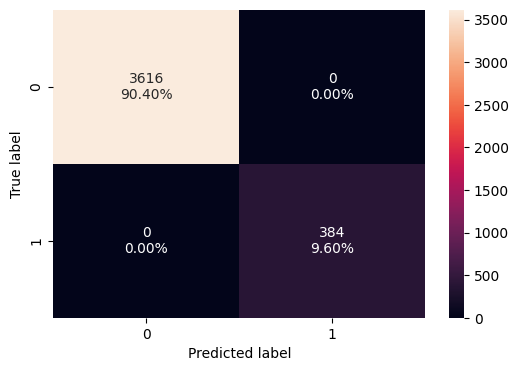

In [ ]:
# plotting confusion matric for model0 ontrining set
plot_confusion_matrix(model0, X_train, Y_train)

In [ ]:
# Calculate model performance metrics on Training Data
model0_metrics_train = model_performance_classification(model0, X_train, Y_train)

model0_metrics_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


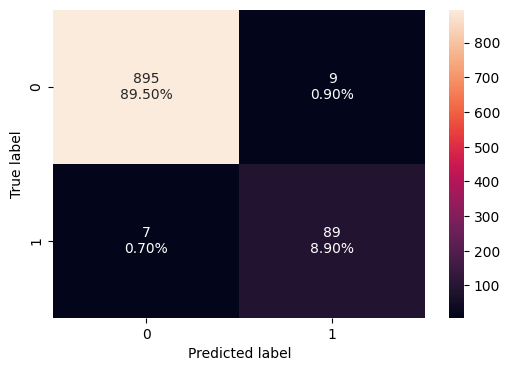

In [ ]:
# Plot confusion matrix on test data
plot_confusion_matrix(model0, X_test, Y_test)

In [ ]:
# Calculate model performance on test data

model0_metrics_test = model_performance_classification(model0, X_test, Y_test)

model0_metrics_test

,Accuracy,Recall,Precision,F1
0,0.984,0.927083,0.908163,0.917526


- There is a little bit of difference between the training and test F1 Scores. This indicates that the model is tendencies of overfit



#### Visualizing the Decision Tree

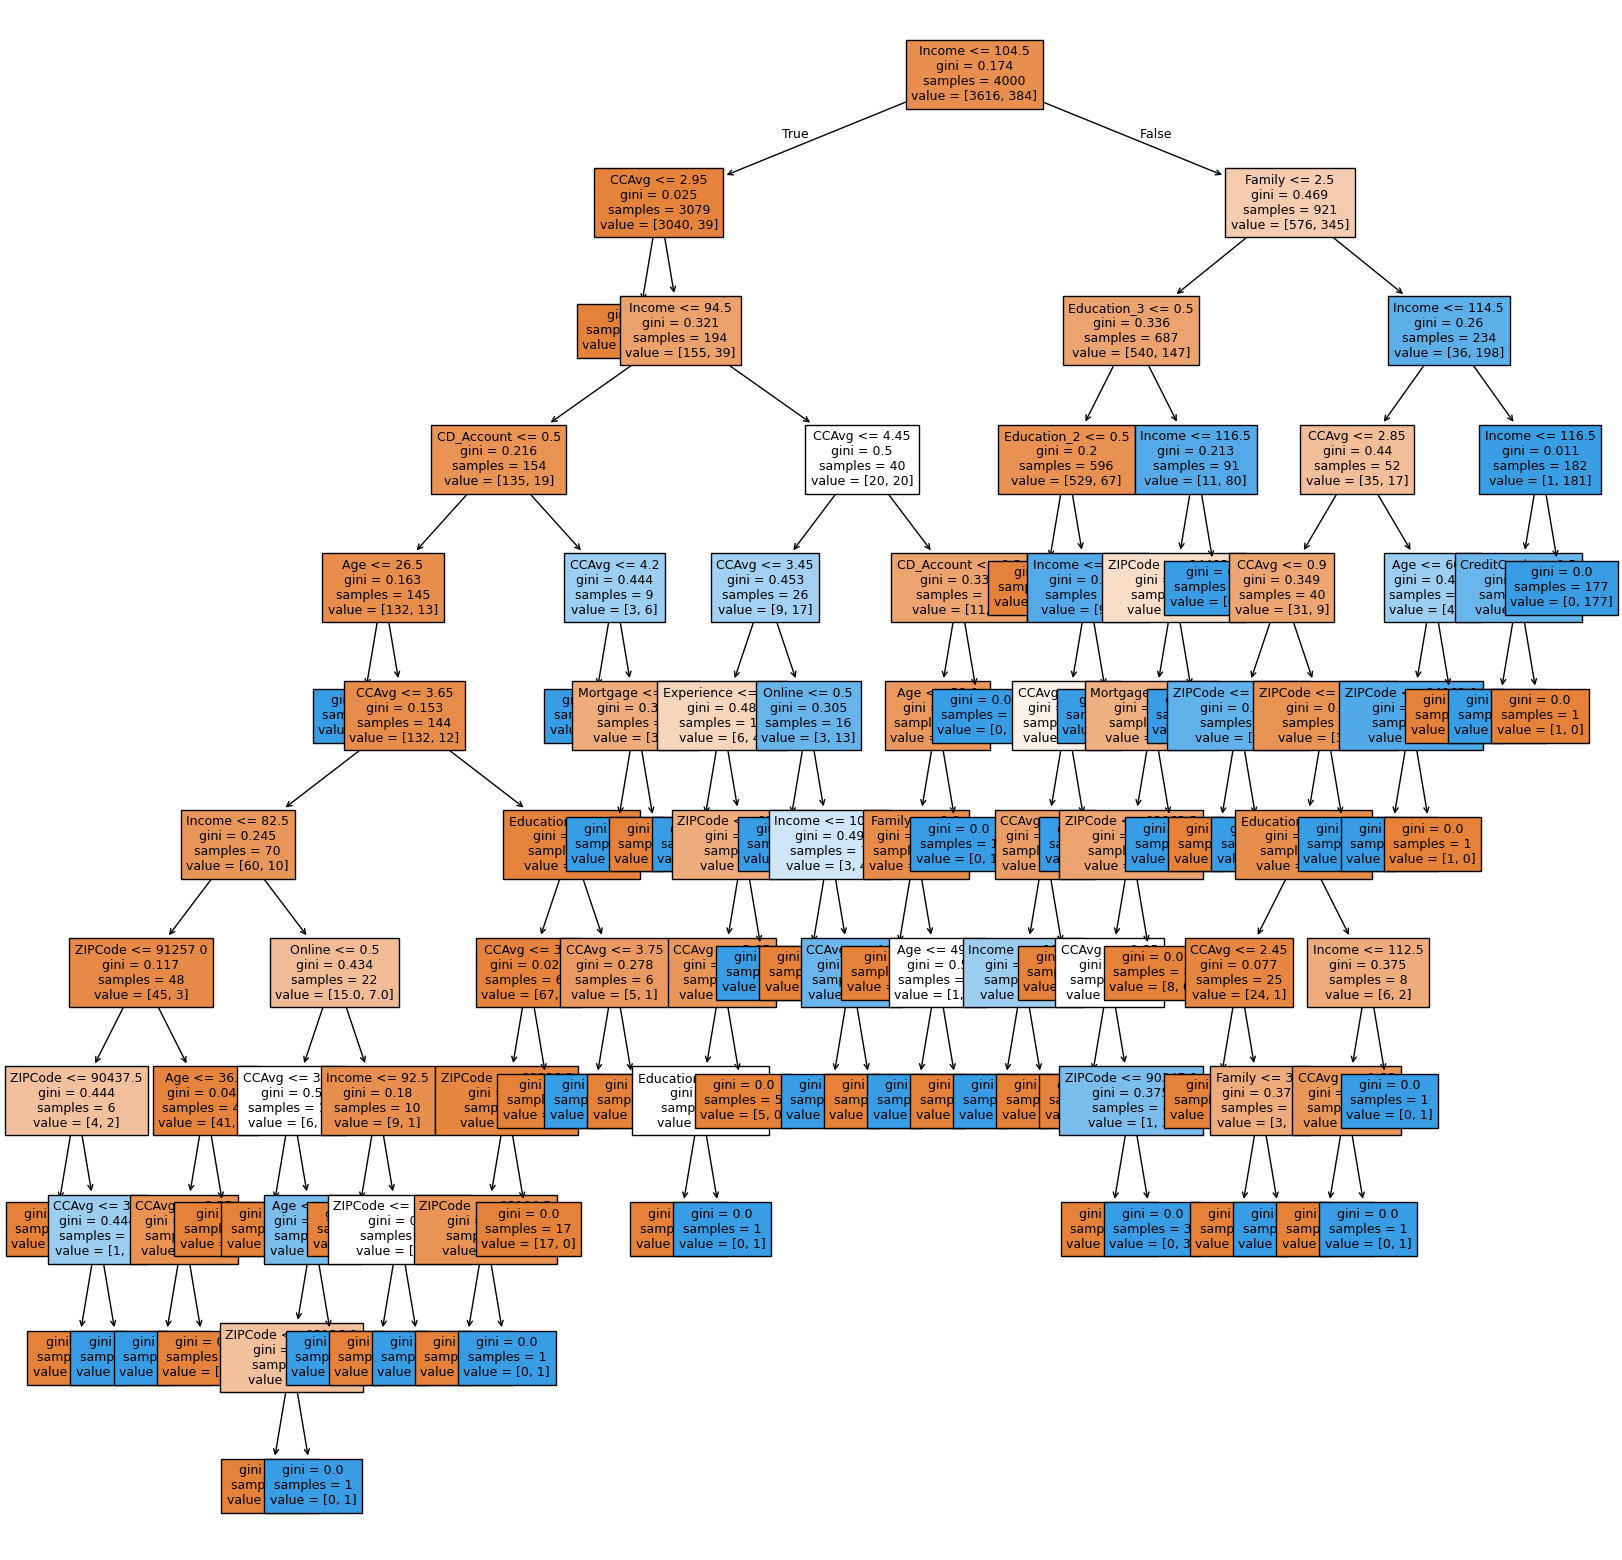

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    model0,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        model0,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2885.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 94.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |--- ZIPCode <= 91257.00
|   |   |   |   |   |   |   |   |--- ZIPCode <= 90437.50
|   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- ZIPCode >  90437.50
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- ZIPCode >  91257.00
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   

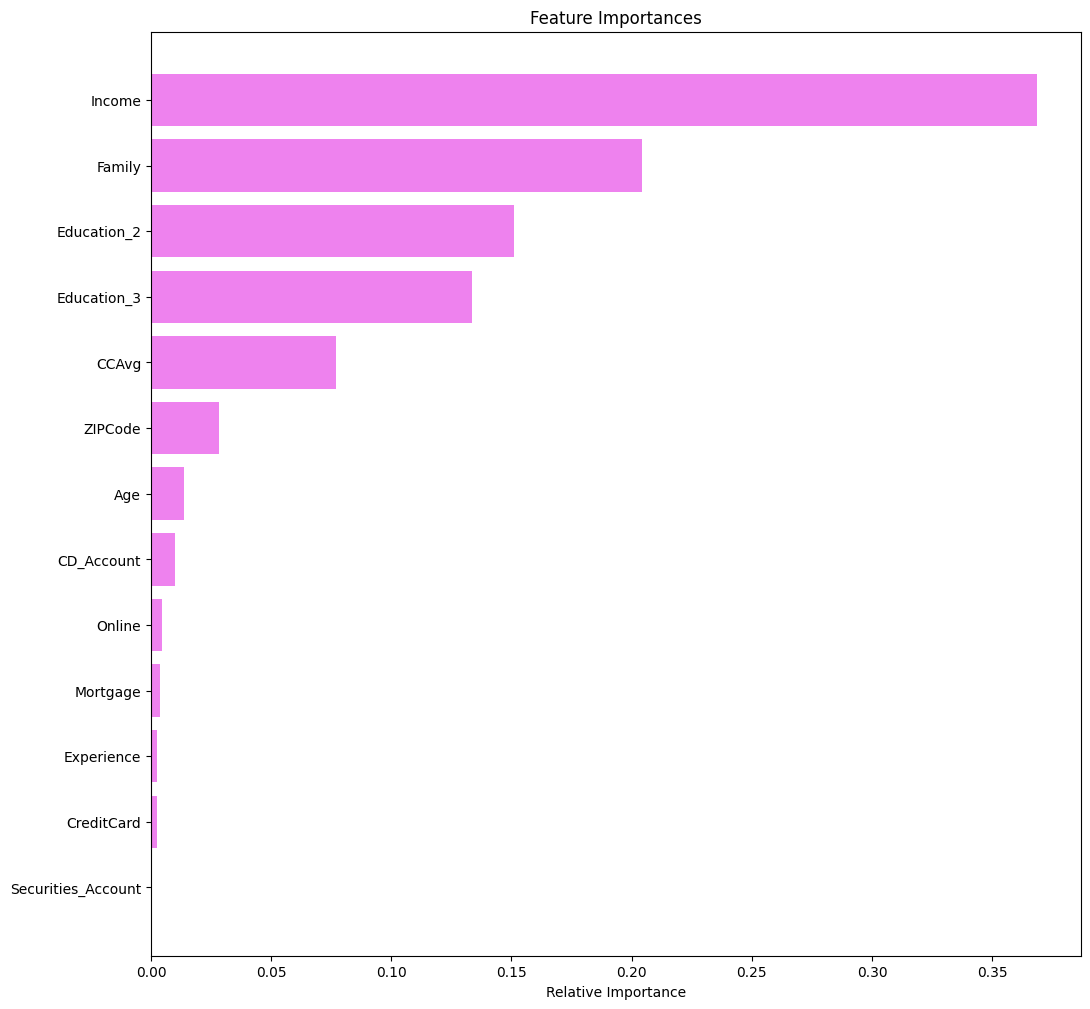

In [ ]:

# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Model Performance Improvement**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15,20],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, random_state=1)

In [ ]:
# creating an instance of the best model
model1 = estimator

# fitting the best model to the training data
model1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, random_state=1)

#### Model Evaluation

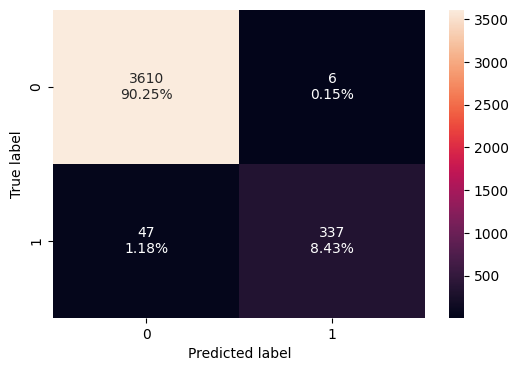

In [ ]:
# Draw confusion matrix on model2 for training data

plot_confusion_matrix(model1, X_train, Y_train)

In [ ]:
# Calculate performance metrics for training data

model1_metrics_train = model_performance_classification(model1, X_train, Y_train)

model1_metrics_train

,Accuracy,Recall,Precision,F1
0,0.98675,0.877604,0.982507,0.927098


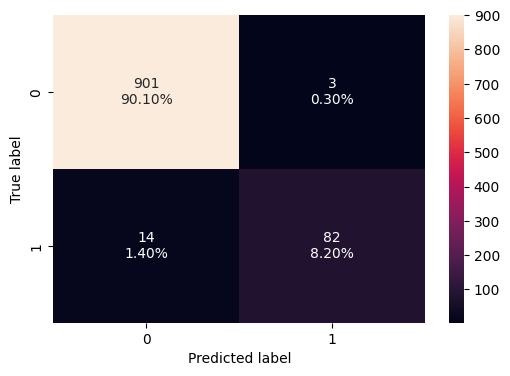

In [ ]:
# plot confusion matrix on test data

plot_confusion_matrix(model1, X_test, Y_test)

In [ ]:
# calculate performance metrics on test data

model1_metrics_test = model_performance_classification(model1, X_test, Y_test)

model1_metrics_test

,Accuracy,Recall,Precision,F1
0,0.983,0.854167,0.964706,0.906077


The training and test scores are very close to each other, indicating a generalized performance.

#### Visualizing the Decision Tree

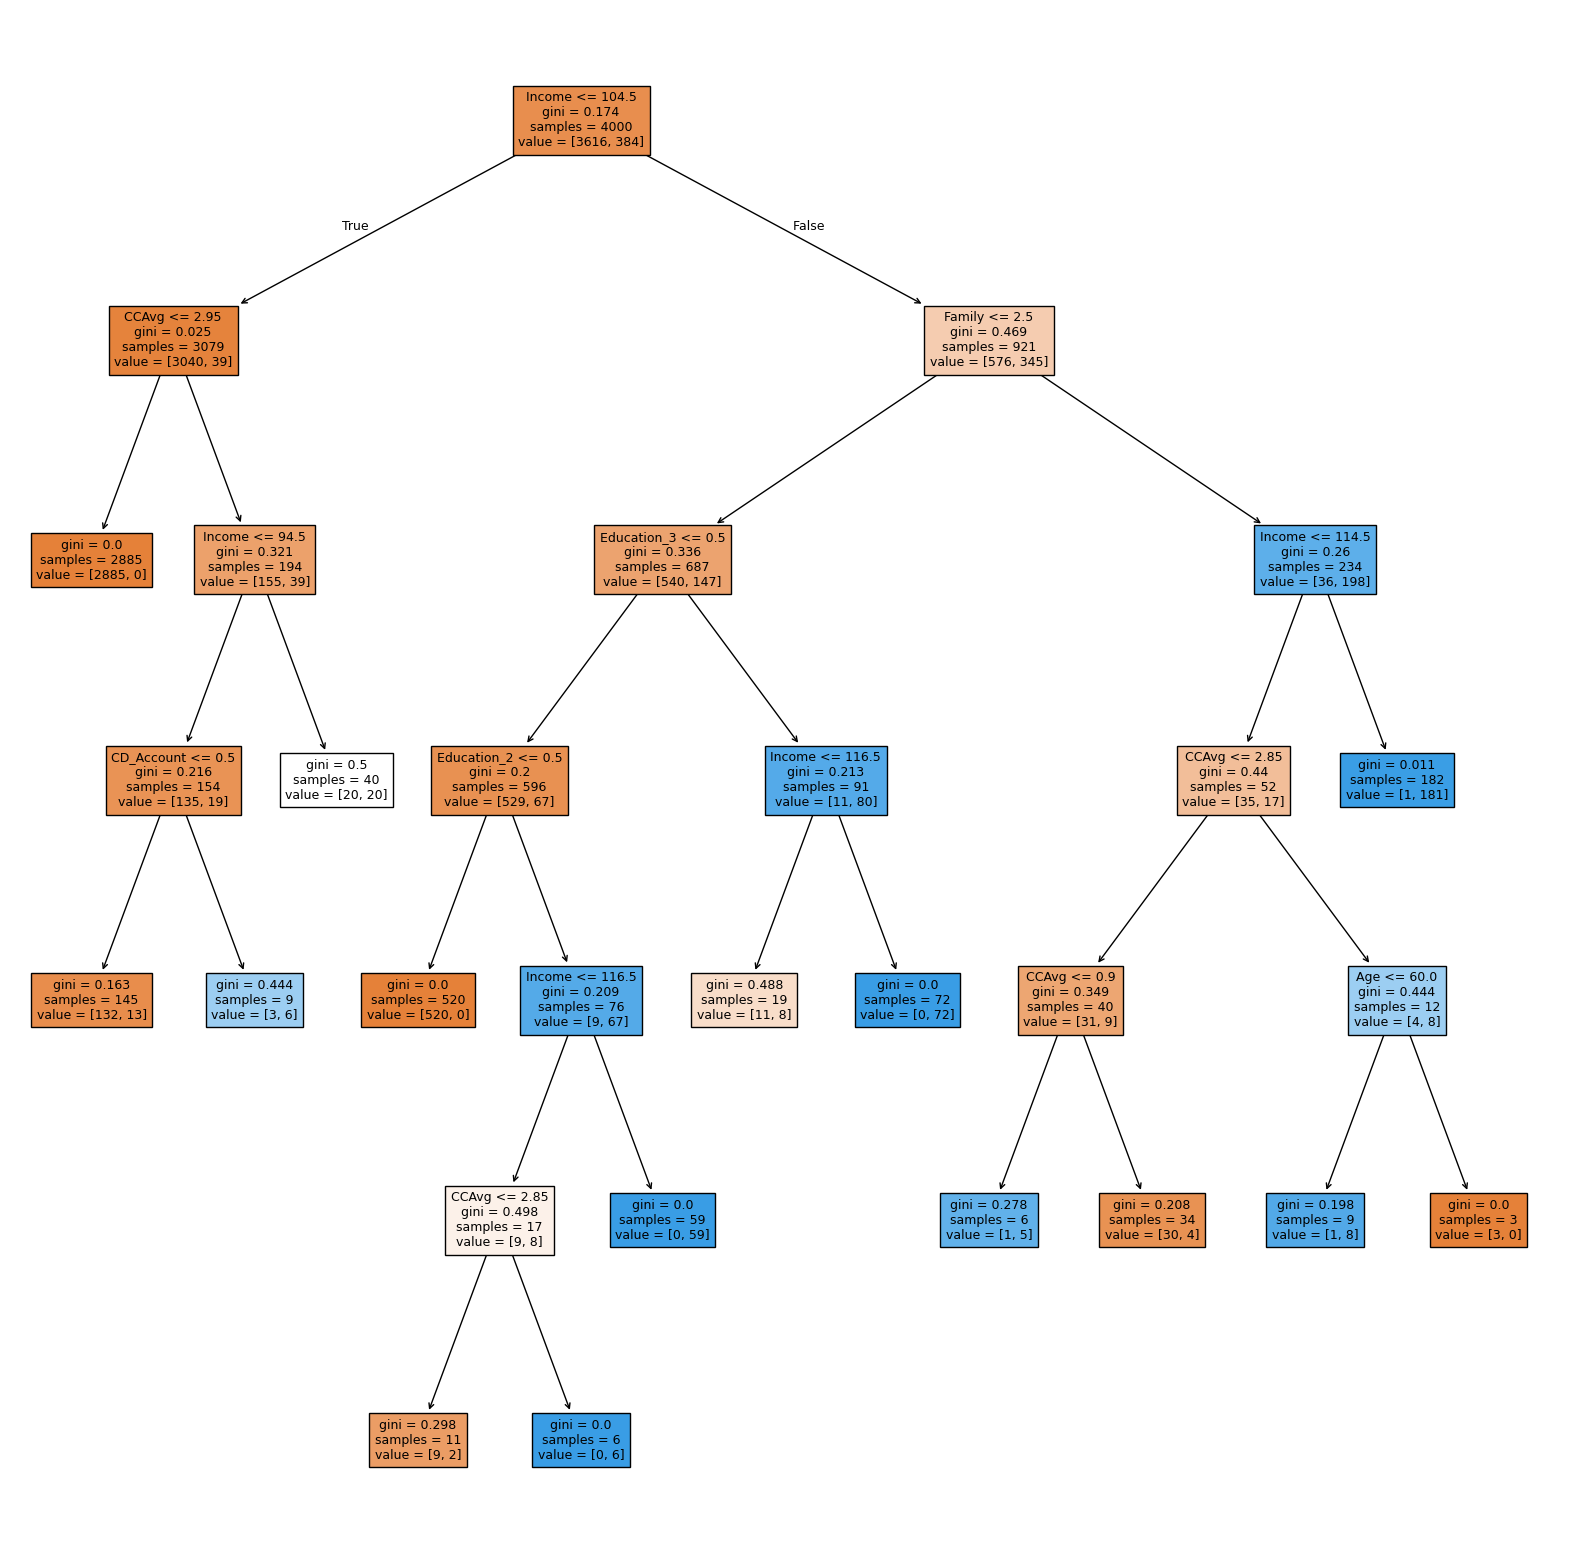

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    model1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

This is a far less complex tree than the previous one.
We can observe the decision rules much more clearly in the plot.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        model1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 104.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2885.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 94.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [132.00, 13.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [3.00, 6.00] class: 1
|   |   |--- Income >  94.50
|   |   |   |--- weights: [20.00, 20.00] class: 0
|--- Income >  104.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [520.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |   |   |--- CCAvg <= 2.85
|   |   |   |   |   |   |--- weights: [9.00, 2.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.85
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |--- Income >  116.50
|   |   |   |   |   |--- weights: [0.00, 59.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 

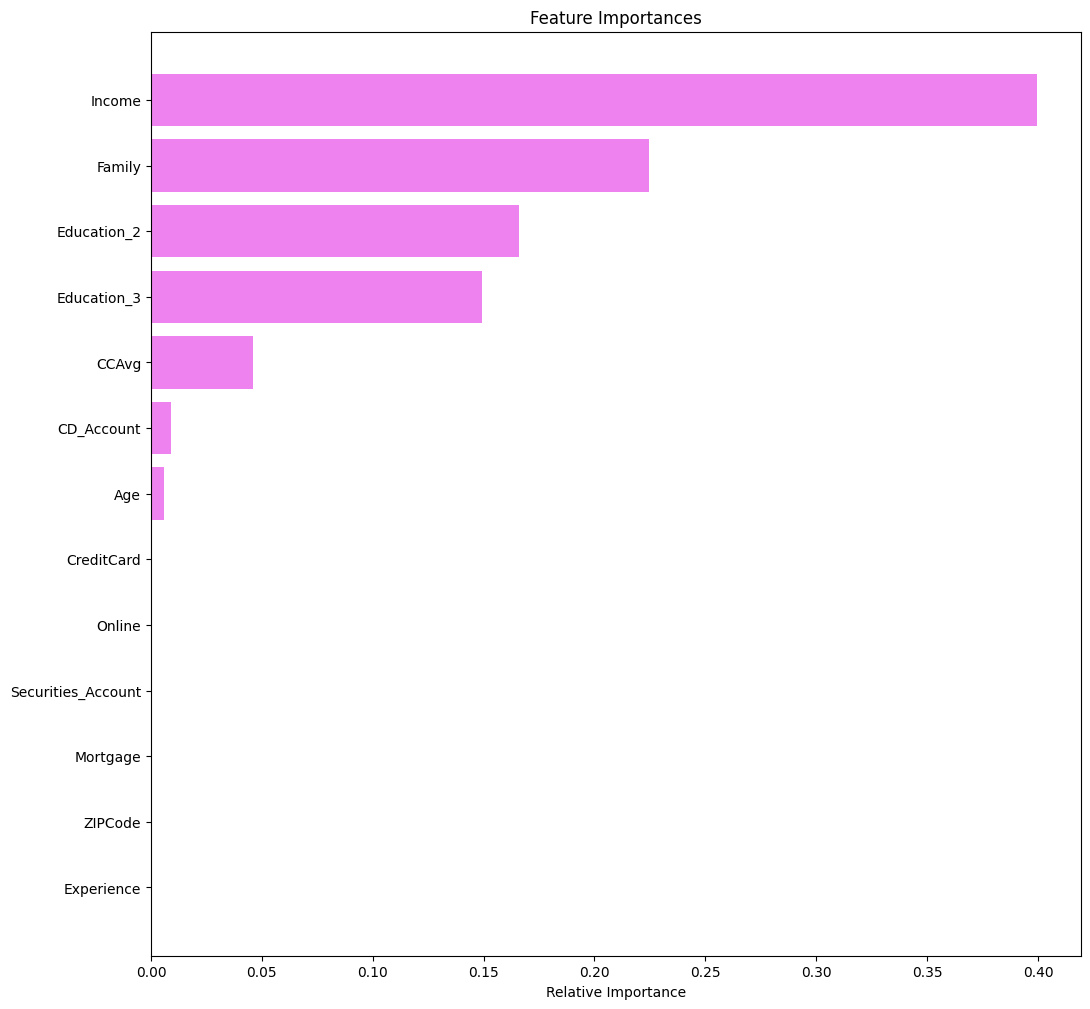

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Decision Tree (Post-pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, Y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000123,0.000493
2,0.000214,0.000921
3,0.000225,0.001371
4,0.000229,0.001830
5,0.000240,0.002310
6,0.000240,0.002790
7,0.000244,0.003278
8,0.000249,0.003775
9,0.000295,0.004659


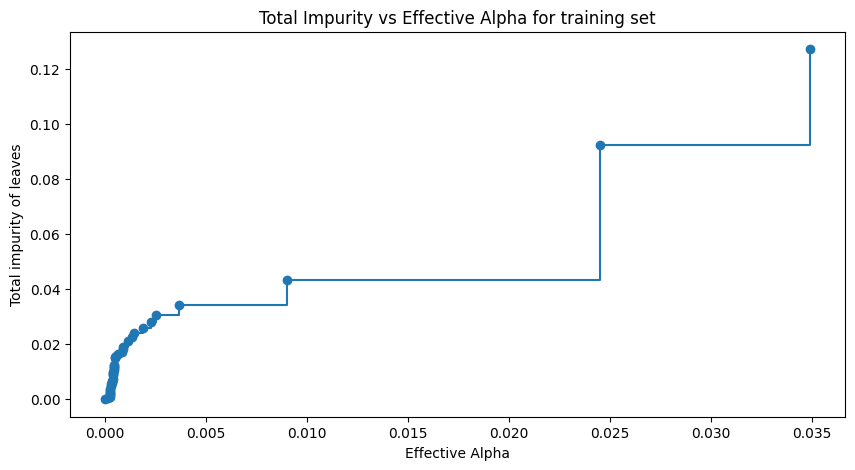

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

- Next, we train a decision tree using the effective alphas.

- The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, Y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.046432259621498106


- Moving ahead, we remove the last element in
``clfs`` and ``ccp_alphas`` as it corresponds to a trivial tree with only one
node.

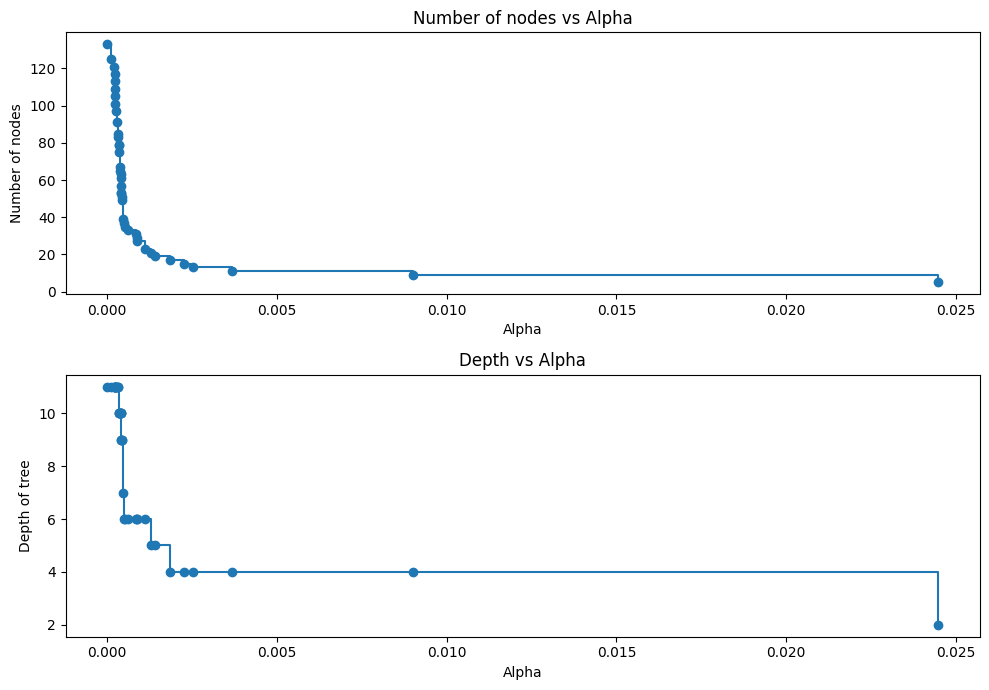

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(Y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(Y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


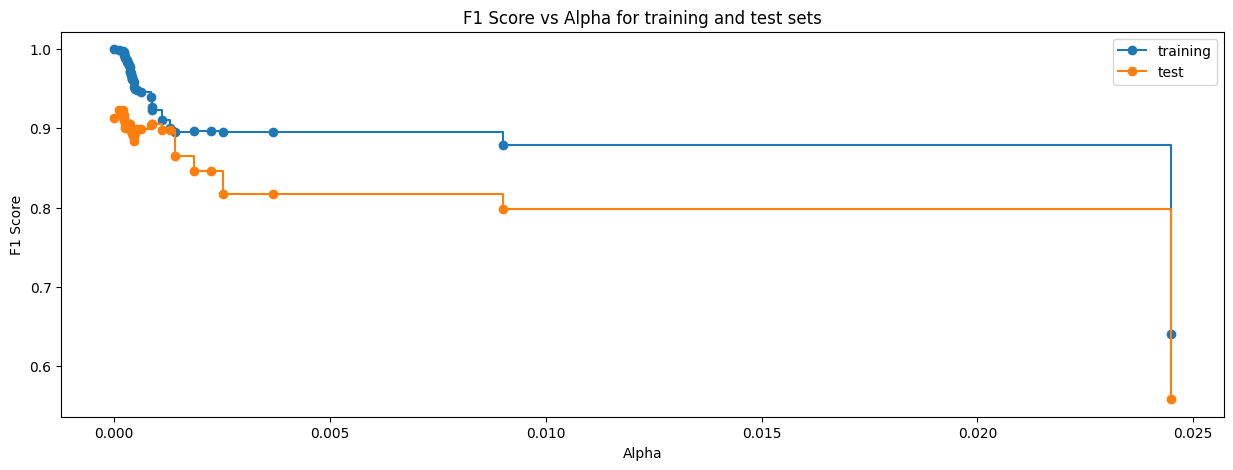

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
model2 = clfs[index_best_model]
print(model2)

DecisionTreeClassifier(ccp_alpha=0.00012316176470588246, random_state=42)


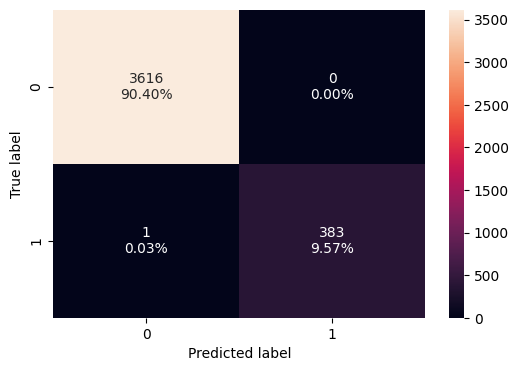

In [ ]:
plot_confusion_matrix(model2, X_train, Y_train)

In [ ]:
model2_metrics_train = model_performance_classification(
    model2, X_train, Y_train
)
model2_metrics_train

,Accuracy,Recall,Precision,F1
0,0.99975,0.997396,1.0,0.998696


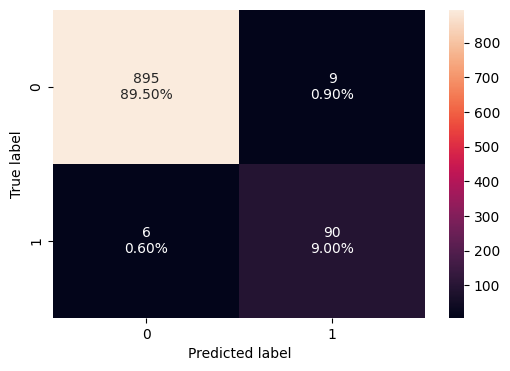

In [ ]:
plot_confusion_matrix(model2, X_test, Y_test)

In [ ]:
model2_metrics_test = model_performance_classification(model2, X_test, Y_test)
model2_metrics_test

,Accuracy,Recall,Precision,F1
0,0.985,0.9375,0.909091,0.923077


#### Visualizing Decision Tree

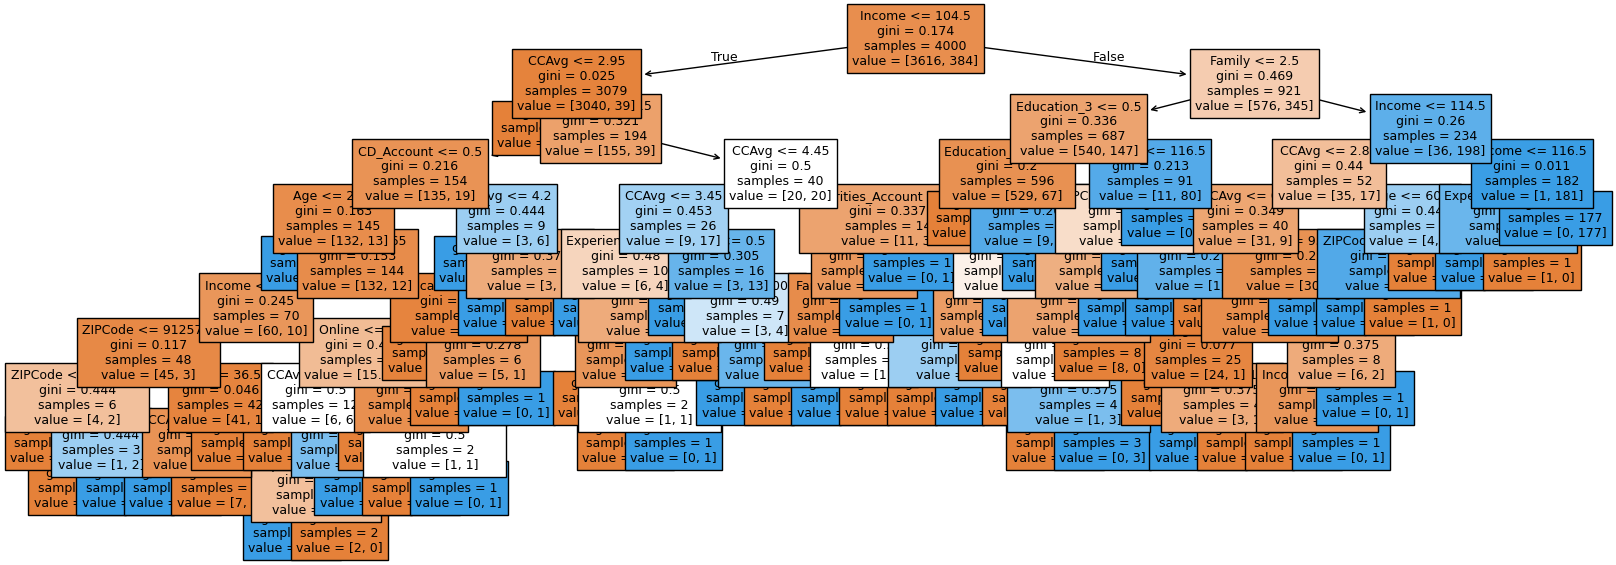

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 7))

# plotting the decision tree
out = tree.plot_tree(
    model2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

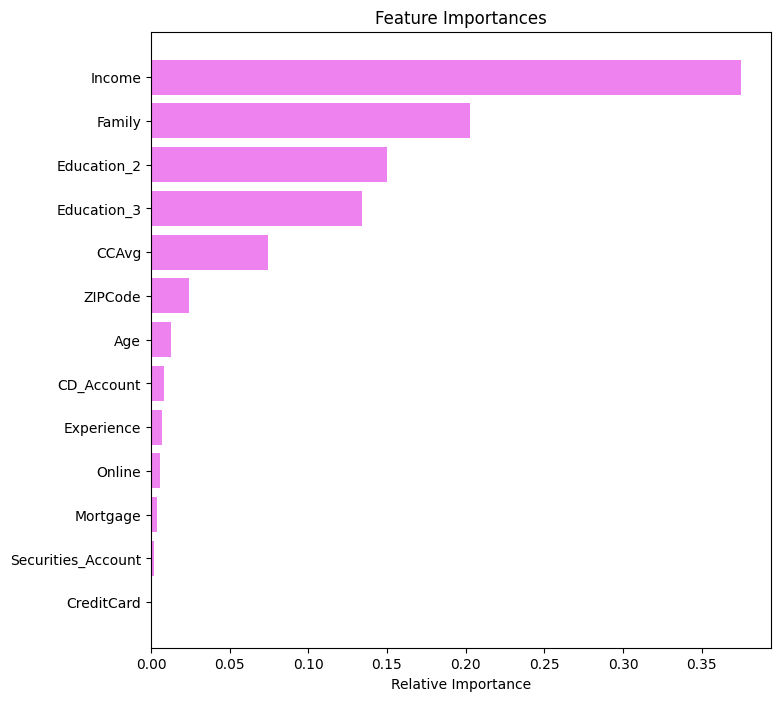

In [ ]:
# importance of features in the tree building
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model0_metrics_train.T,
        model1_metrics_train.T,
        model2_metrics_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.986750,0.999750
Recall,1.0,0.877604,0.997396
Precision,1.0,0.982507,1.000000
F1,1.0,0.927098,0.998696


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        model0_metrics_test.T,
        model1_metrics_test.T,
        model2_metrics_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.984000,0.983000,0.985000
Recall,0.927083,0.854167,0.937500
Precision,0.908163,0.964706,0.909091
F1,0.917526,0.906077,0.923077


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

  -  Decision tress can easily overfit , so we have to be careful using decision tree.
  - It was observed that outlier treatment did not make much difference in the performance of the model
  - Based on EDA, Decision tree , Income ,Educatoin,Family,CCavg are most important factor.
  - So for this campaign we can have different profiles for customers like High Profile Clients with high income, higher levels of Education, bigger families and high spending
  - Average Profile :- Medium income group,Graduate level education.3/4Family members,medium spending
  - Low Profile:-Lower income group,undergrads ,3/4Family Member,low spending
  - Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.
  - We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.
  - Prequalifying for Loan can also attract more customers.
  - Our 2nd target would be Medium profile customers.
  -

___